In [34]:
import mountaincar
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
def createTiling():    
    num_tiles = 10
    min_x = -1.2
    max_x = 0.5
    x_tile_width = (max_x - min_x) / (num_tiles - 2)
    min_y = -0.07
    max_y = 0.07
    y_tile_width = (max_y - min_y) / (num_tiles - 2)
    
    #tiles = np.zeros((10,4), dtype=np.int)
    tilings = np.zeros((10, 2, 10))
    
    for tiling in range(num_tiles):
        x_offset = np.random.uniform(0, x_tile_width)
        #print("X offset:", x_offset)
        y_offset = np.random.uniform(0, y_tile_width)     
        xs = np.linspace(min_x, max_x + x_tile_width, num_tiles) - x_offset
        #print(np.linspace(min_x, max_x + x_tile_width, num_tiles))
        ys = np.linspace(min_y, max_y + y_tile_width, num_tiles) - y_offset
        #print(np.linspace(min_y, max_y + y_tile_width, num_tiles))
        tilings[tiling] = np.array([xs, ys])
        
    return tilings

def genIndices(state, action, tilings):
    position = np.array(state[0])
    velocity = np.array(state[1])
    
    action_index = action + 1
    
    num_tilings = len(tilings)
    tiling_length = 10
    tiling_height = 10
    num_tiles = num_tilings * tiling_length * tiling_height
    
    tiles = np.zeros(10, dtype=np.intp)
    for tiling in range(num_tilings):
        xs = tilings[tiling][0]
        ys = tilings[tiling][1]
        xi = np.digitize(position, xs)
        yi = np.digitize(velocity, ys)
        index = (action_index * num_tiles) + (tiling * tiling_length * tiling_height) + xi + (yi * tiling_height)
        tiles[tiling] = int(index)
    return tiles


In [50]:
#env = mountaincar.MountainCar()
#state = np.array([env.position, env.velocity])
#print(state)
#action = 0
#tilings_test = createTiling()
#F = genIndices(state, action, tilings_test)
#print(F)

In [71]:
def e_greedy_action(theta, s, actions, tilings):
        Q = np.zeros(3)
        for a in actions:
            F = genIndices(s, a, tilings)
            Qa = calcQ(F, theta)
            Q[a + 1] = Qa
        maxQ = max(Q)
        if (Q == maxQ).sum() > 1:
            best = [i for i in range(len(actions)) if Q[i] == maxQ]
            i = random.choice(best)
        else:
            i = np.argmax(Q)
        action = actions[i]
        Qa = Q[i]
        return action, Qa

In [72]:
def calcQ(F, theta):
    Qa = 0
    for i in F:
        Qa = Qa + theta[i]
    return Qa

In [61]:
def play(env, num_episodes, alpha=0.1, gamma=1.0, epsilon=0.05, lambda_=0.9, plot=False):

    theta = np.zeros(3000)
    
    reward_per_episode = np.zeros(num_episodes)
    steps_per_episode = np.zeros(num_episodes)
    
    # Create tilings
    tilings = createTiling()
    
    for episode in range(num_episodes):
        
        cumulative_reward = 0
        step = 0

        e = np.zeros(3000)
        env.reset()
        
        # Get starting state and action
        state = np.array([env.position, env.velocity])
        action = random.choice(env.actions)
        
        while not env.game_over:
            
            F = genIndices(state, action, tilings)
            
            # Eligibility traces
            for i in F:
                e[i] = 1 # Replacing traces
            
            # Make step and get reward and next state
            reward = env.make_step(action)
            state_ = np.array([env.position, env.velocity])
            
            # Calculate Q and then TD error
            Qa = calcQ(F, theta)
            delta = reward - Qa
            
            # Epsilon greedy next action choice
            if np.random.uniform(0, 1) < (1 - epsilon):
                action_, Qa_ = e_greedy_action(theta, state_, env.actions, tilings)
            else:
                action_ = random.choice(env.actions)
                F = genIndices(state_, action, tilings)
                Qa_ = calcQ(F, theta)
            
            # Update delta, theta and e
            delta = delta + gamma * Qa_
            theta = theta + alpha * delta * e
            e = gamma * lambda_ * e
            
            # Set s = s' and a = a'
            state = np.copy(state_)
            action = action_
            
            # Increment step counter and cumulative reward
            step += 1
            cumulative_reward += reward
            
            # Plot graph if plot boolean on
            if plot == True:
                env.plot()
                
        reward_per_episode[episode] = cumulative_reward
        steps_per_episode[episode] = step
    
    print("complete")
    return reward_per_episode, steps_per_episode
            

In [70]:
n_agents = 50
num_episodes = 100
all_rewards = np.zeros(num_episodes)
all_steps = np.zeros(num_episodes)
for i in range(n_agents):
    #sarsa_agent = SarsaAgent(alpha=0.1, gamma=1.0, epsilon=0.05, lambda_=0.9)
    env = mountaincar.MountainCar()
    rewards, steps = play(env, num_episodes, alpha=0.1, gamma=1.0, epsilon=0.05, lambda_=0.9, plot=False)
    all_rewards += rewards
    all_steps += steps

all_rewards = all_rewards / n_agents
all_steps = all_steps / n_agents

complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete


In [ ]:
play(env, num_episodes, alpha=0.1, gamma=1.0, epsilon=0.05, lambda_=0.9, plot=True)

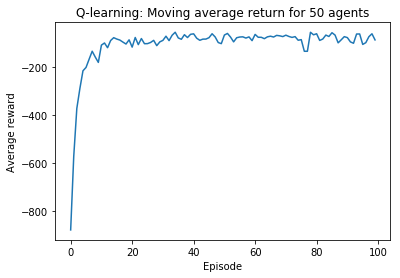

In [73]:
#print(all_rewards)

plt.plot(all_rewards)
plt.title("Q-learning: Moving average return for "+ str(n_agents) + " agents")
plt.xlabel('Episode')
plt.ylabel('Average reward')
plt.show()